<a href="https://colab.research.google.com/github/Karan1914/DataScience-Pandas100/blob/master/CPUvsGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from numba import jit
import numpy as np 
# to measure exec time 
from timeit import default_timer as timer    

# normal function to run on cpu 
def func(a,n):                                 
    for i in range(n): 
        a[i]+= 1
    return a


# function optimized to run on gpu  
@jit
#(target ="cuda")                          
def func2(a,n): 
    for i in range(n): 
        a[i]+= 1
    


if __name__=="__main__": 
    number_list = [10,100,1000,10000,100000,10000000,100000000,1000000000,10000000000]
    number_list_small = [10,100,1000,10000,100000,10000000]
    CPU_timer_list=[]
    GPU_timer_list=[]
    for n in number_list_small:
      

      #n = 1000                          
      a = np.ones(n, dtype = np.float64) 
      b = np.ones(n, dtype = np.float32) 

      start = timer() 
      func(b,n) 
      #print(x)
      cpu_time = timer()-start
      CPU_timer_list.append(cpu_time)
          

      start = timer() 
      func2(b,n) 
      #print(y)
      gpu_time = timer()-start
      GPU_timer_list.append(gpu_time)
    print("without GPU:", CPU_timer_list) 
    print("with GPU:", GPU_timer_list) 

    round_CPU_timer_list = [round(num, 5) for num in CPU_timer_list]
    round_GPU_timer_list = [round(num, 5) for num in GPU_timer_list]

    print()

    print("without GPU:", round_CPU_timer_list) 
    print("with GPU:", round_GPU_timer_list) 



without GPU: [5.9964999763906235e-05, 0.0003070890002163651, 0.002731269999912911, 0.02770596399977876, 0.2785245549998763, 28.48974858199972]
with GPU: [0.0781489569999394, 3.0780001907260157e-06, 1.3569997463491745e-06, 1.2400999821693404e-05, 5.5095999869081425e-05, 0.0036523389999274514]

without GPU: [6e-05, 0.00031, 0.00273, 0.02771, 0.27852, 28.48975]
with GPU: [0.07815, 0.0, 0.0, 1e-05, 6e-05, 0.00365]


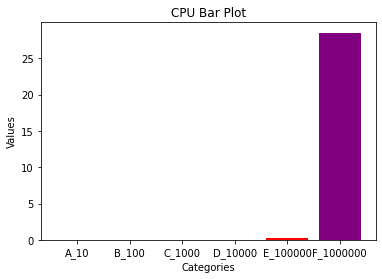

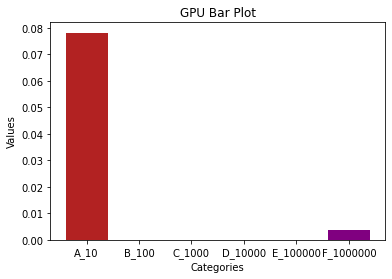

In [46]:
import matplotlib.pyplot as plt

x=['A_10','B_100','C_1000','D_10000','E_100000','F_1000000','G_10000000']


x=['A1','B2','C3','D4','E5','F6']


#plt.bar(x1,round_CPU_timer_list)
plt.bar(x1,round_CPU_timer_list, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple'])

plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('CPU Bar Plot')
plt.show()


x=['A1','B2','C3','D4','E5','F6','G7']

plt.bar(x1,round_GPU_timer_list, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple'])

plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('GPU Bar Plot')
plt.show()

In [8]:
a = np.ones(4, dtype = np.float64) 
print(a)

for i in range(4): 
        a[i]+= 1
print(a)

[1. 1. 1. 1.]
[2. 2. 2. 2.]


GPUs are a safer bet for fast machine learning because, at its heart, data science model training is composed of simple matrix math calculations, the speed of which can be greatly enhanced if the computations can be carried out in parallel.

CPUs are best at handling single, more complex calculations sequentially, while GPUs are better at handling multiple but simpler calculations in parallel.

GPU compute instances will typically cost 2-3x that of CPU compute instances, so unless you’re seeing 2-3x performance gains in your GPU-based training models, go with CPUs.